In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import pickle

In [20]:
#Load the data
train_x = pd.read_pickle("data/train_x.pkl")
val_x = pd.read_pickle("data/val_x.pkl")
test_x = pd.read_pickle("data/test_x.pkl")
x_nulls = pd.read_pickle("data/x_nulls.pkl")

train_y = pd.read_pickle("data/train_y.pkl")
val_y = pd.read_pickle("data/val_y.pkl")
test_y = pd.read_pickle("data/test_y.pkl")
y_nulls = pd.read_pickle("data/y_nulls.pkl")

In [21]:
#Add constants for the regression
train_x = sm.add_constant(train_x)
test_x = sm.add_constant(test_x)
val_x = sm.add_constant(val_x)
x_nulls = sm.add_constant(x_nulls)

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [22]:
#Define model performance metrics
def model_performance(model, columns, train_x, train_y, val_x, val_y, test_x, test_y, include_test = False):

    train_predictions = model.predict(train_x.drop(columns=columns))
    val_predictions = model.predict(val_x.drop(columns=columns))
    mae_train = mean_absolute_error(train_y,train_predictions)
    mae_val = mean_absolute_error(val_y,val_predictions)
    mae_mean = mean_absolute_error(val_y,np.full((len(val_y),1),average))
    print('\nMean absolute error in train set : ', mae_train)
    print('Mean absolute error in val set : ', mae_val)
    print('Mean absolute error predicting with mean : ', mae_mean)

In [23]:
#I tried different models and dropped the columns that are not statiscally significant
#Many of the store_branch_ features are not significant, but we are going to take care of
#that by using regularization later
columns=["quantity","kg","rating", "seniority 1", "seniority 0","seniority 2",
         "found_rate", "accepted_rate"] #columns to be dropped
model = sm.OLS(train_y, train_x.drop(columns=columns)).fit()
train_predictions = model.predict(train_x.drop(columns=columns))

In [24]:
#R2 of 0.59, so the model has a decent prediction power
model.summary()

/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/usr/local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          total_minutes   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     19.42
Date:                Sun, 19 Jan 2020   Prob (F-statistic):               0.00
Time:                        13:26:47   Log-Likelihood:                -25259.
No. Observations:                5588   AIC:                         5.129e+04
Df Residuals:                    5200   BIC:                         5.387e+04
Df Model:                         387                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            81.3094      1.010     80.512      0.000      79.330      83.289
on_demand                                        -6.0618      0.704     -8.608      0.000      -7.442      -4.681
picking_speed                                     3.3066      0.423      7.818      0.000       2.477       4.136
seniority 3                                       9.7445      3.068      3.176      0.002       3.730      15.759
distinct_products                                35.3938      1.075     32.939      0.000      33.287      37.500
distance                                          4.5250      0.348     13.015      0.000       3.843       5.207
quantity_ratio                                    4.8548      0.783      6.198      0.000       3.319       6.390
distinct_ratio                                  -22.5317      1.333    -16.905      0.000     -25.145     -19.919
kg_ratio                                          1.3583      0.402      3.381      0.001       0.571       2.146
store_branch_008bd5ad93b754d500338c253d9c1770   -21.0270     23.017     -0.914      0.361     -66.150      24.096
store_branch_00a03ec6533ca7f5c644d198d815329c    -8.1453     23.006     -0.354      0.723     -53.246      36.955
store_branch_013a006f03dbc5392effeb8f18fda755  3.668e-13   3.83e-13      0.959      0.338   -3.83e-13    1.12e-12
store_branch_0188e8b8b014829e2fa0f430f0a95961    -4.9746     23.015     -0.216      0.829     -50.094      40.145
store_branch_01e00f2f4bfcbb7505cb641066f2859b    23.1211     23.011      1.005      0.315     -21.990      68.232
store_branch_02180771a9b609a26dcea07f272e141f   -16.3754     23.005     -0.712      0.477     -61.476      28.725
store_branch_021bbc7ee20b71134d53e20206bd6feb -5.327e-14   2.13e-13     -0.250      0.802   -4.71e-13    3.64e-13
store_branch_02b1be0d48924c327124732726097157  9.303e-13   5.22e-13      1.781      0.075   -9.38e-14    1.95e-12
store_branch_02f039058bd48307e6f653a2005c9dd2    13.7916     13.306      1.036      0.300     -12.294      39.877
store_branch_03f544613917945245041ea1581df0c2   -16.7434     23.011     -0.728      0.467     -61.855      28.368
store_branch_040a99f23e8960763e680041c601acab   -16.1662     23.007     -0.703      0.482     -61.270      28.938
store_branch_045117b0e0a11a242b9765e79cbf113f    17.2302      8.741      1.971      0.049       0.094      34.367
store_branch_051928341be67dcba03f0e04104d9047    24.4268     13.306      1.836      0.066      -1.659      50.513
store_branch_0533a888904bd4867929dffd884d60b8     0.6639     23.005      0.029      0.977     -44.436      45.764
store_branch_05546b0e38ab9175cd905eebcc6ebb76    22.2661     16.286      1.367      0.172      -9.661      54.193
store

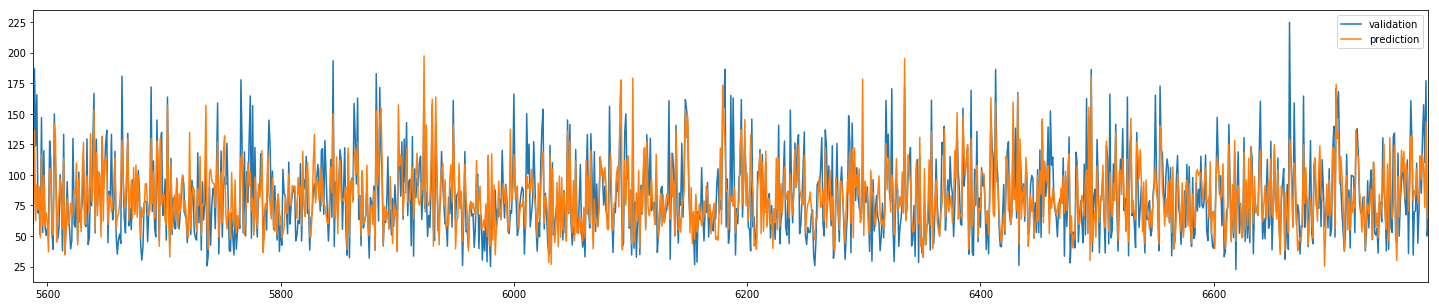

In [6]:
#Make predictions and plot the results
val_predictions = model.predict(val_x.drop(columns=columns))
val_y.plot(label="validation",figsize=(25,5))
val_predictions.plot(label="prediction")
plt.legend()
plt.show()

In [7]:
#We are going to use mean absolute error as the kpi for the models, as it well let us have a better
#understanding of the % error in relation to the mean dispatch times
average = train_y.mean()
rmse_train = mean_squared_error(train_y,train_predictions)**(0.5)
rmse_val = mean_squared_error(val_y,val_predictions)**(0.5)
rmse_mean = mean_squared_error(val_y,np.full((len(val_y),1),average))**(0.5)

#Errors are a bit bigger in train than test set, which means there is overfitting
# Significant reductions in MAE have been achieved, in relation to predicting with the mean
print('\nRMSE in train set : ', rmse_train)
print('RMSE in val set : ', rmse_val)
print('RMSE by predicting with mean : ', rmse_mean)
model_performance(model, columns, train_x, train_y, val_x, val_y, test_x, test_y, include_test = False)
print("\nMean dispatch time: ", average)


RMSE in train set :  22.22825983066347
RMSE in val set :  23.080109733865577
RMSE by predicting with mean :  33.7530562733881

Mean absolute error in train set :  16.189106089700402
Mean absolute error in val set :  17.427070106727285
Mean absolute error predicting with mean :  26.922199625614244

Mean dispatch time:  80.73896346344846


In [25]:
#Regularization OLS
#Define functions to find the best regularization term

#Regularized regression function
def regularized_regression(alpha):
    model = sm.OLS(train_y, train_x.drop(columns=columns)).fit_regularized(alpha=alpha)
    val_predictions = model.predict(val_x.drop(columns=columns))
    rmse_val = mean_squared_error(val_y,val_predictions)**(0.5)
    print("\nalpha : ", alpha)
    print('RMSE in val set : ', rmse_val)
    mae_val = mean_absolute_error(val_y,val_predictions)
    print('Mean absolute error in val set : ', mae_val)
    return rmse_val, mae_val, model

#Itera through alphas and keep the best one
def tune_alpha(alphas):
    best_rmse = 10000
    best_mae = 10000
    best_alpha = None
    best_model = None
    rmses = []
    maes = []
    for alpha in alphas:
        rmse_val, mae_val, model = regularized_regression(alpha)
        rmses.append(rmse_val)
        maes.append(mae_val)
        if mae_val < best_mae:
            best_mae = mae_val
            best_rmse = rmse_val
            best_alpha = alpha
            best_model = model
    return best_rmse, best_mae, best_alpha, best_model, rmses, maes


In [ ]:
#Define a wide search grid, then refine search
alphas = [0.004, 0.005,0.006, 0.007, 0.008, 0.009, 0.1]
best_rmse, best_mae, best_alpha, best_model, rmses, maes = tune_alpha(alphas)

In [ ]:
#Check performance.  Still some overfitting
print('Best alpha : ', best_alpha)
model_performance(model, columns, train_x, train_y, val_x, val_y, test_x, test_y, include_test = False)

In [26]:
#Refine the grid
alphas = [0.02, 0.022, 0.024, 0.026, 0.028, 0.03]
best_rmse, best_mae, best_alpha, best_model, rmses, maes = tune_alpha(alphas)


alpha :  0.028
RMSE in val set :  22.674339996375863
Mean absolute error in val set :  17.145002114759873


In [27]:
#Overfitting  dissapeared and the errors went down
print('Best alpha : ', best_alpha)
model_performance(best_model, columns, train_x, train_y, val_x, val_y, test_x, test_y, include_test = False)

Best alpha :  0.028

Mean absolute error in train set :  17.45547304439341
Mean absolute error in val set :  17.145002114759873
Mean absolute error predicting with mean :  26.922199625614244


In [28]:
#Reported mean absolute error of 17.25
test_predictions = model.predict(test_x.drop(columns=columns))
mae_test = mean_absolute_error(test_y,test_predictions)
print('Mean absolute error in test set : ', mae_test)

Mean absolute error in test set :  17.25007346067403


In [31]:
#Dump the predictions
with open("predictions/regression.csv", "w") as f:
    predictions = best_model.predict(x_nulls.drop(columns=columns))
    [f.write("{}, {}\n".format(i,j)) for (i,j) in zip(y_nulls.order_id, predictions)]

In [32]:
#Dump the model
pickle.dump(best_model, open("models_dump/regression.sav", 'wb'))